In [13]:
from nilearn.input_data import NiftiLabelsMasker
import os 
data_dir = '/home/jflournoy/data/GenR_motion/'
sub_dir = '/sub-1045/ses-F09/func/'
rs_file = 'sub-1045_ses-F09_task-rest_acq-0006_run-0000_space-MNI152NLin2009cAsym_desc-nuisanced_bold.nii.gz'
rsfilename = data_dir + '/' + sub_dir + '/' + rs_file
rsfilename

'/home/jflournoy/data/GenR_motion///sub-1045/ses-F09/func//sub-1045_ses-F09_task-rest_acq-0006_run-0000_space-MNI152NLin2009cAsym_desc-nuisanced_bold.nii.gz'

In [14]:
# masker = NiftiLabelsMasker(labels_img='../power_spheres/power_drysdale_spheres.nii', standardize=True,
#                            memory='nilearn_cache', verbose=5)

In [15]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

# One subject of resting-state data
#data = datasets.fetch_adhd(n_subjects=1)
#fmri_filenames = data.func[0]

Atlas ROIs are located in nifti image (4D) at: /home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


In [16]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(rsfilename)

[NiftiLabelsMasker.fit_transform] loading data from /home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/jflournoy/data/GenR_motion///sub-1045/ses-F09/func//sub-1045_ses-F09_task-rest_acq-0006_run-0000_space-MNI152NLin2009cAsym_desc-nuisanced_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single

In [17]:
os.path.isfile(rsfilename)

True

In [18]:
time_series = None
if os.path.isfile(rsfilename):
    time_series = masker.fit_transform(rsfilename)

[NiftiLabelsMasker.fit_transform] loading data from /home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/jflournoy/data/GenR_motion///sub-1045/ses-F09/func//sub-1045_ses-F09_task-rest_acq-0006_run-0000_space-MNI152NLin2009cAsym_desc-nuisanced_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading dat

In [19]:
time_series

array([[-1.72971599, -1.67801984, -1.74809267, ..., -1.59125826,
        -1.67759129, -1.71326213],
       [-1.71812074, -1.64532555, -1.7427029 , ..., -1.54433588,
        -1.65217465, -1.69917203],
       [-1.70651263, -1.6432748 , -1.71363547, ..., -1.57902547,
        -1.65829334, -1.68637349],
       ...,
       [ 1.70046589,  1.53277182,  1.66487572, ...,  1.58302056,
         1.67417886,  1.67841171],
       [ 1.69850716,  1.592072  ,  1.69281365, ...,  1.65032046,
         1.70304751,  1.69675022],
       [ 1.70630612,  1.71683934,  1.72925555, ...,  1.7311582 ,
         1.72937319,  1.71494176]])

In [20]:
from nilearn.connectome import ConnectivityMeasure
import numpy as np
from nilearn import plotting
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

'/home/jflournoy/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

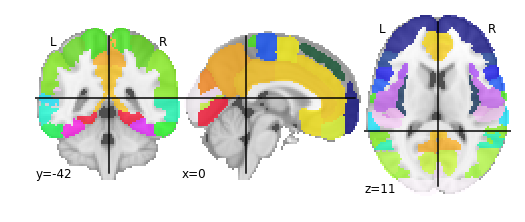

In [21]:
#plotting.plot_roi('../power_spheres/power_drysdale_spheres.nii')
display(atlas_filename)
plotting.plot_roi(atlas_filename)

/home/jflournoy/anaconda3/lib/python3.7/site-packages/nilearn/plotting/matrix_plotting.py:99: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(mat, method=reorder)
/home/jflournoy/anaconda3/lib/python3.7/site-packages/nilearn/plotting/matrix_plotting.py:100: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)


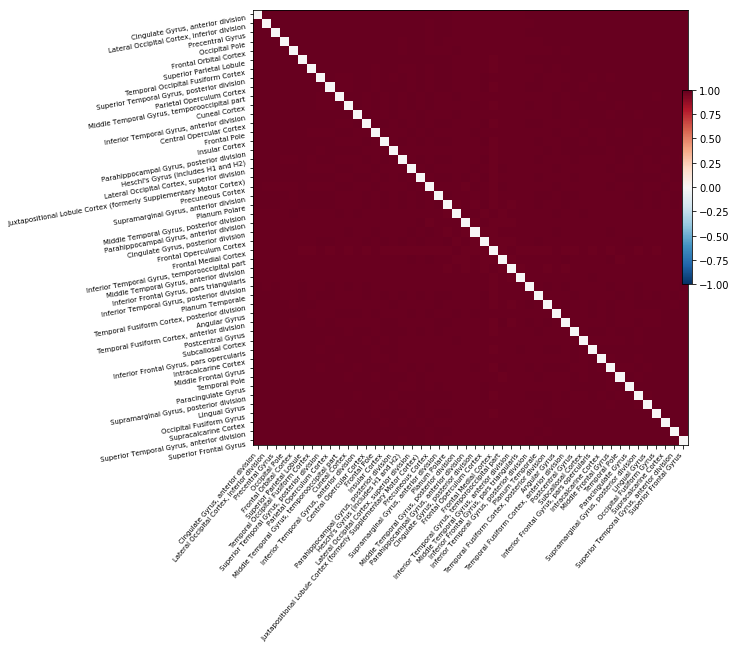

In [22]:
# Plot the correlation matrix

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=1, vmin=-1, reorder=True)